# Proste metody statystyczne

[Piotr Migdał](http://migdal.wikidot.com/), 2015, [DELab UW](http://www.delab.uw.edu.pl/)

Pokażę proste metody statystyczne takie jak regresja liniowa.

Zbiór danych https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset - z gier w StarCraft 2.

In [36]:
%matplotlib inline
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("../dane/SkillCraft1_Dataset.csv", na_values=["?"])

In [12]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0,0.000019


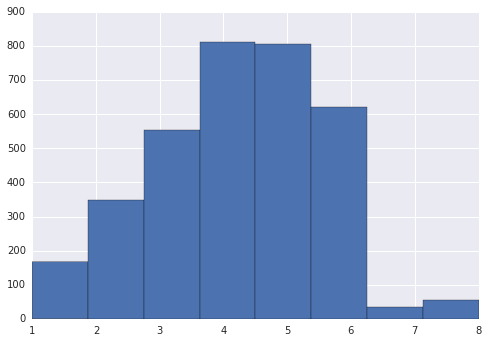

In [23]:
# wyższa liga, lepiej
df["LeagueIndex"].hist(bins=8)

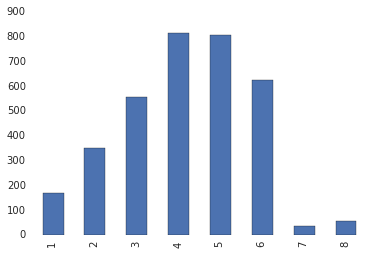

In [41]:
df["LeagueIndex"].value_counts().sort_index().plot(kind='bar')

In [31]:
df_some = df.loc[:,"LeagueIndex":"APM"]

In [43]:
df_some.corr()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
LeagueIndex,1.000000,-0.127825,0.217976,0.023884,0.662309
Age,-0.127825,1.000000,-0.184508,-0.016630,-0.210559
HoursPerWeek,0.217976,-0.184508,1.000000,0.024306,0.246844
TotalHours,0.023884,-0.016630,0.024306,1.000000,0.072850
APM,0.662309,-0.210559,0.246844,0.072850,1.000000


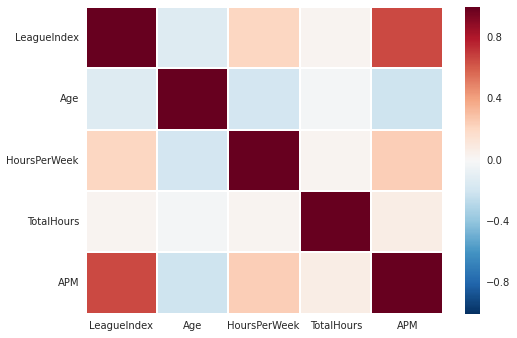

In [34]:
sns.heatmap(df_some.corr())

In [42]:
df_some.corr(method='spearman')

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
LeagueIndex,1.000000,-0.080620,0.223304,0.496817,0.676098
Age,-0.080620,1.000000,-0.208218,-0.023819,-0.185088
HoursPerWeek,0.223304,-0.208218,1.000000,0.450767,0.251820
TotalHours,0.496817,-0.023819,0.450767,1.000000,0.400220
APM,0.676098,-0.185088,0.251820,0.400220,1.000000


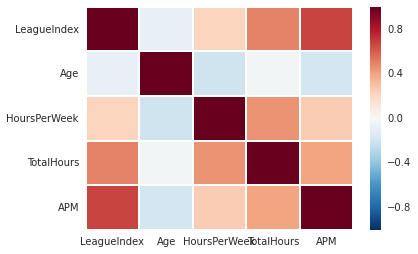

In [44]:
sns.heatmap(df_some.corr(method='spearman'))

/usr/local/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


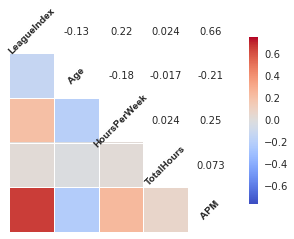

In [45]:
sns.corrplot(df_some)

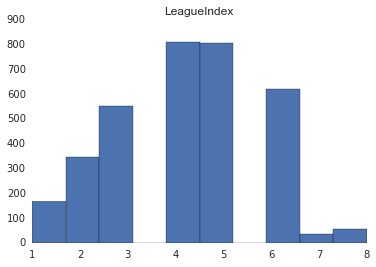

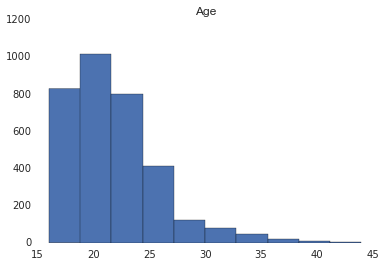

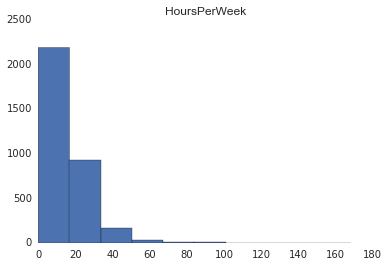

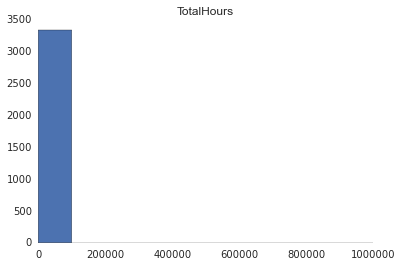

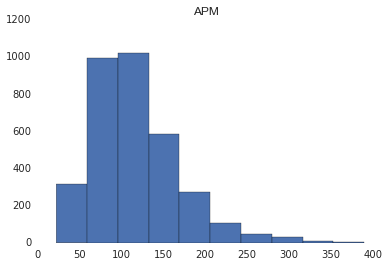

In [39]:
for col in df_some:
    df_some[col].hist()
    plt.title(col)
    plt.show()

In [ ]:
df_some = 

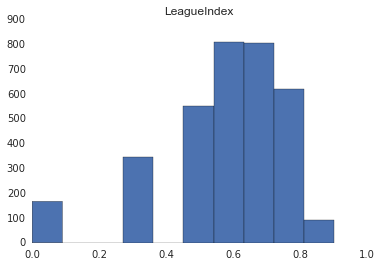

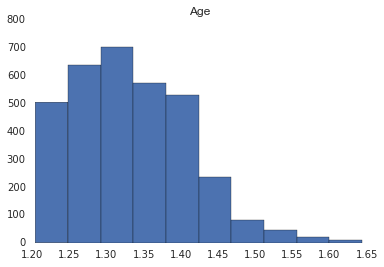

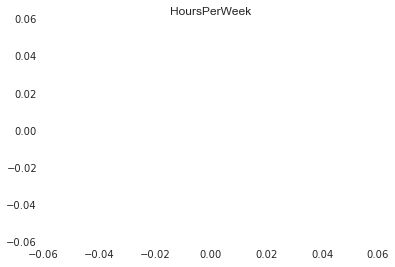

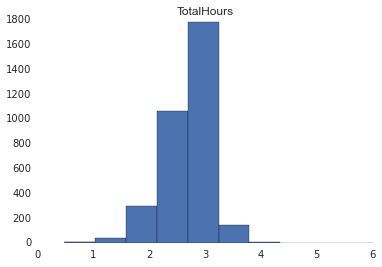

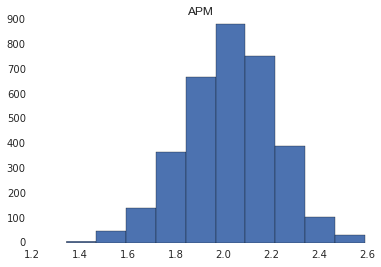

In [46]:
# Wydaje sie, ze dla wszystkiego procz ligii lepsza bylaby skala logarytmiczna
for col in df_some:
    np.log10(df_some[col]).hist()
    plt.title(col)
    plt.show()